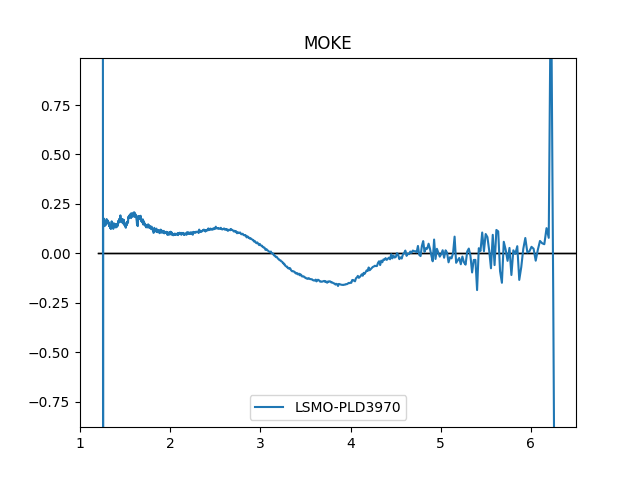

In [4]:
import os
from typing import List
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


def fce(x,b,bk,t):       #b[0]=b, b[1]=k*b, b[2]=temny proud
    return b*np.power(np.sin(x),2)+bk*np.sin(2*x)+t

def Fit(names,uhly,path):
    resultados = []
    for name in names:
        directory = [f for f in os.listdir(path) if name in f]
        # print(directory)
        for director, i in zip(directory,list(range(0,len(directory)))):
            if i == 0:
                datap = pd.read_csv(path + director, skiprows=12, index_col=0, sep='\t', header=None)
            else:
                rawp = pd.read_csv(path + director, skiprows=12, index_col=0, sep='\t', header=None)
                datap = pd.concat([datap, rawp], axis=1)
        rawp = datap
        kerr = []
        err = []
        kerrp = []
        i=0
        for ind, row in rawp.iterrows():
            x = uhly
            y = np.array(row.values.astype(float))
            kerrinka,perrinka = cf(fce,np.deg2rad(x),y)
            if 1240/ind > 3.5 and 1240/ind < 3.50:
              plt.plot(x,y,'.', label = path)
              plt.plot(np.arange(-16,16,0.1),fce(np.deg2rad(np.arange(-16,16,0.1)),kerrinka[0],kerrinka[1],kerrinka[2]))
              plt.xlim(-15,15)
              plt.figure()
            err.append(np.sqrt(np.diag(perrinka)))
            kerr.append(np.rad2deg(kerrinka[1]/kerrinka[0]))
            kerrp.append(np.rad2deg(kerrinka[1]/kerrinka[0]))

        # plt.plot(1240/rawp.index,np.rad2deg(kerrp),label='pos')
        # zapis = pd.DataFrame({'MOKE' : np.rad2deg(kerrn)},index = 1240/rawp.index)
        # zapis.to_csv(path + names[0][:-1] + '_kerrrot_pos.dat')
        # zapis = pd.DataFrame({'MOKE' : np.rad2deg(kerrp)},index = 1240/rawp.index)
        # zapis.to_csv(path + names[0][:-1] + '_kerrrot_neg.dat')
    #    plt.figure()
        plt.plot([1.2,7],[0,0],'k-', linewidth = 1)

        resultados.append([kerr,rawp.index.astype(float),err])
        # dataa = pd.read_csv('Python\\Plotit\\LSMO_STO_Kerr_2021.dat', index_col = 0)
        # plt.plot(dataa['MOKE'], label = 'Measurment 2021')
        # d = pd.DataFrame({'MOKEE' : resultados[0][0]},index = 1240/resultados[0][1])
        # rozdil = pd.concat([dataa,d])
        # rozdil = rozdil.sort_index()
        # rozdil = rozdil.interpolate(method = 'index')
        # print(rozdil)
        # plt.plot(rozdil['MOKE'].subtract(rozdil['MOKEE']))
    off = 0
    for k in range(len(resultados)):
        plt.plot(1240/resultados[k][1],[i-off for i in resultados[k][0]], label = names[k])
        plt.title('MOKE')
        # plt.plot(1240/resultados[k][1],[i-j for i,j in zip(resultados[k][0],lol)], label = 'rozdil')
        zapis = pd.DataFrame({'MOKE' : [i-off for i in resultados[k][0]]},index = 1240/resultados[k][1])
        zapis.to_csv(path + names[k][:-1] + '_kerrrot.dat')



#########################################################################################################################################
#########################################################################################################################################
plt.plot([1.2,7],[0,0],'k-', linewidth = 1)



# castispek = []
# for i in range(1,6):
#     castispek = castispek + ['time_' + str(i) + '_']

castispek = ['LSMO-PLD3970']

z = 10
p = 20
k = 5
uhl = [z - (z-k)/(p-1)*i for i in range (p)] + [-k - (z-k)/(p-1)*i for i in range (p)]
# uhl = [z - (z-k)/(p-1)*i for i in range (p)]

cestou = r'C:\Users\tmale\OneDrive\Documents\Data\PPMS\PLD3970\-1T\raw_data\spectra\\' 
Fit(castispek,uhl,cestou)








plt.legend()
plt.ylim(-0.88,0.99)
plt.xlim(1,6.5)
plt.show()

C:/Users/tmale/OneDrive/Documents/Data/PPMS/PLD3970/1T/raw_data/spectra/LSMO-PLD397_kerrrot.dat
C:/Users/tmale/OneDrive/Documents/Data/PPMS/PLD3970/-1T/raw_data/spectra/LSMO-PLD397_kerrrot.dat


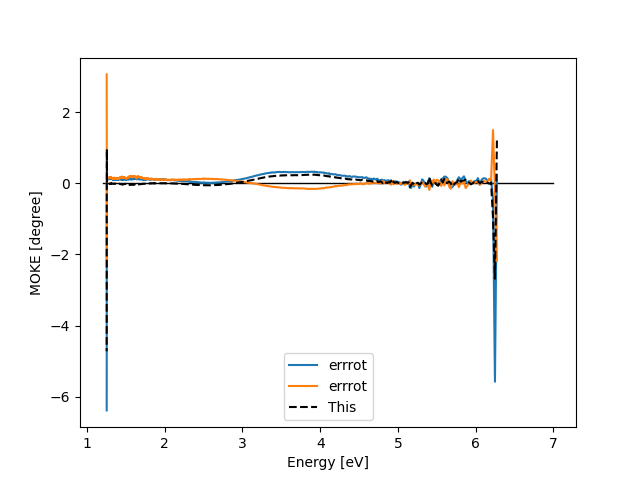

In [5]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


plt.plot([1.2,7],[0,0],'k-', linewidth = 1)
for i in range (1,2):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
    root.destroy()
    for filee in filename:
        data = pd.read_csv(filee,comment='#', index_col=0)
        plt.plot(data['MOKE'], label = filee[-10:-4])
        print(filee)

for i in range (1,2):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
    root.destroy()
    for filee in filename:
        datam = pd.read_csv(filee,comment='#', index_col=0)
        plt.plot(datam['MOKE'], label = filee[-10:-4])
        print(filee)

data['MOKE'] = (data['MOKE']-datam['MOKE'])/2
plt.plot(data['MOKE'],'k--',label = 'This')
data.to_csv(r'C:\Users\tmale\OneDrive\Documents\Data\PPMS\PLD3970\PLD3970_1T--1T.dat')


# sto = pd.read_csv(r'C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE\\PLD3967\\PLD3967_Kerrrot_15_03_2022.dat', index_col=0)
# plt.plot(sto,'k--',label = 'Reference')
# rozdil = pd.concat([data,sto])
# rozdil = rozdil.sort_index()
# rozdil = rozdil.interpolate(method = 'index')
# plt.plot(rozdil['MOKE'].subtract(rozdil['MOKEE']), label = 'Rozdil')



# plt.title('PLD3978')
plt.ylabel('MOKE [degree]')
plt.xlabel('Energy [eV]')
plt.legend()
# plt.ylim(-0.1,0.2)
plt.show()

C:/Users/tmale/OneDrive/Documents/Data/MnTe/Tepla dira/Trojuhelnicek/MnTe_troj_smycka_no_zrcatka.dat
0.0107655842604363
0.0034891645070426504
0.01071784044342205
0.0035648853577456008
0.011166634486584158
0.0041440870811014505
0.010555335535150501
0.0032282958453222
0.0101206953913441
0.0033447391477243495


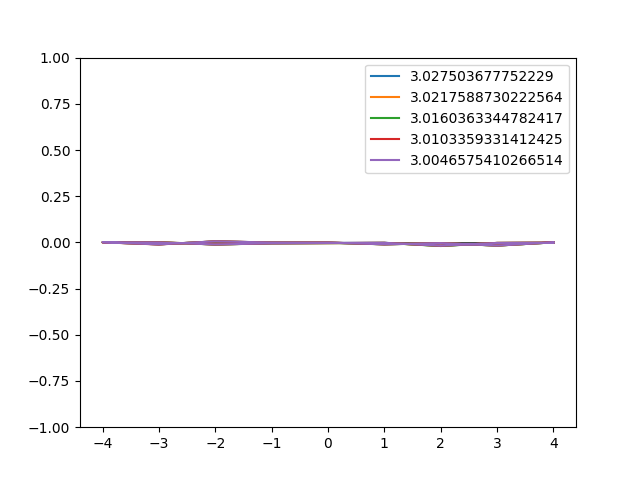

In [37]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import math
%matplotlib widget




plt.plot([-4,4],[0,0],'k-', linewidth = 0.5)
root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\MnTe\\Tepla dira\\Trojuhelnicek\\",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=False)
print(filename)
root.destroy()
data = pd.read_csv(filename, index_col=0)
for energie in data.index:
    pole = list(data.loc[energie].index)
    pole = [i.split('T')[0] for i in pole]
    pole = [float(i[5:]) for i in pole]
    if energie < 3.03 and energie>3:
        print((data.loc[energie,'MOKE 4T down']-data.loc[energie,'MOKE 2T down']+data.loc[energie,'MOKE 4T up']-data.loc[energie,'MOKE 2T up'])/2)
        print((data.loc[energie,'MOKE -4T up']-data.loc[energie,'MOKE -2T down']+data.loc[energie,'MOKE -4T up']-data.loc[energie,'MOKE -2T up'])/2)
        plt.plot(pole,list(data.loc[energie]),label = energie)
    # uloz = pd.DataFrame({str(energies[0]) : list(data.iloc[rowenergie])},index = pole)
    # uloz.to_csv(filee[:-4] + '_' + str(energies[0]) + 'eV_slice.dat')



plt.legend()
plt.ylim(-1,1)
plt.show()

('C:/Users/tmale/OneDrive/Documents/Data/MnTe/Tepla dira/Zrcatko/zrcatko_4T_prumer.dat',)
('C:/Users/tmale/OneDrive/Documents/Data/MnTe/Tepla dira/Zrcatko/zrcatko_-4T_prumer.dat',)


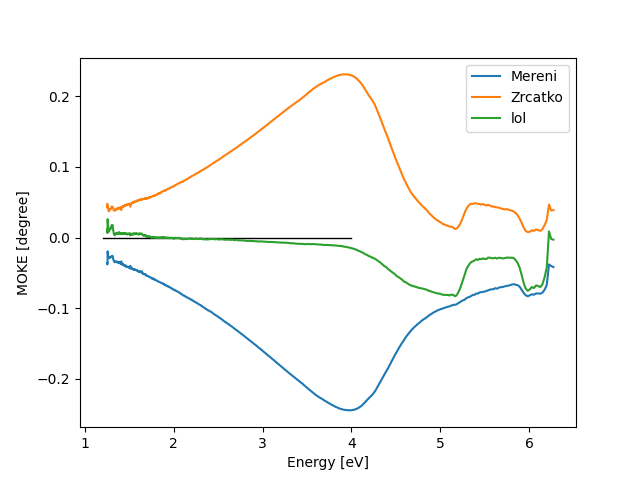

In [77]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


plt.plot([1.2,4],[0,0],'k-', linewidth = 1)
for i in range (1,3):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\MnTe\\Tepla dira\\Trojuhelnicek\\",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
    print(filename)
    root.destroy()
    if i==1:
        data = pd.read_csv(filename[0], index_col=0)
        plt.plot(data, label = 'Mereni')
    if i ==2:
        datac = pd.read_csv(filename[0], index_col=0)
        plt.plot(datac,label = 'Zrcatko')
        datac['MOKE'] = datac['MOKE'].add(data['MOKE'])
        datac['MOKE'] = datac['MOKE']
        plt.plot(datac['MOKE'],label = 'lol')
        # datac.to_csv('C:\\Users\\tmale\\OneDrive\\Documents\\Data\\MnTe\\Tepla dira\\xxx\\zrcatko4T.dat')
    if i == 3:
        data = pd.read_csv(filename[0], index_col=0)
        plt.plot(data,label = '4 T')
    # if i ==1:
    #     for filee in filename:
    #         data = pd.read_csv(filee, index_col=0)
    #         krouh = data[data.index<3.85]
    #         plt.plot(krouh['MOKE'], label = 'Experimet')
    #         a = np.polyfit(krouh.index,krouh['MOKE'],3,)
    #         x = np.arange(1.2,4,0.1)
    #         plt.plot(x,[a[3]+a[2]*k+a[1]*k**2+a[0]*k**3 for k in x],'k--')
    #         lulz = []
    #         for lel in krouh.index:
    #             lulz.append(krouh.loc[lel,'MOKE']-(a[3]+a[2]*lel+a[1]*lel**2+a[0]*lel**3))
    #         plt.plot(krouh.index,lulz,'r-')
    #         pandik = pd.DataFrame(lulz, index = krouh.index)
    #         pandik.to_csv(filee[:-4]+'_bez_lorentz.dat')
    # else:
    #     for filee in filename:
    #         data = pd.read_csv(filee, index_col=0)
    #         krouh = data[data.index<3.85]
    #         plt.plot(krouh['MOKE'], label = 'Experimet')


# sto = pd.read_csv(r'C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE\\PLD3967\\PLD3967_Kerrrot_15_03_2022.dat', index_col=0)
# plt.plot(sto,'k--',label = 'Reference')
# rozdil = pd.concat([data,sto])
# rozdil = rozdil.sort_index()
# rozdil = rozdil.interpolate(method = 'index')
# plt.plot(rozdil['MOKE'].subtract(rozdil['MOKEE']), label = 'Rozdil')


# plt.title('PLD3978')
plt.ylabel('MOKE [degree]')
plt.xlabel('Energy [eV]')
plt.legend()
# plt.ylim(-0.1,0.2)
plt.show()

('C:/Users/tmale/OneDrive/Documents/Data/MnTe/Tepla dira/Trojuhelnicek/MnTe_troj_smycka_no_zrcatka.dat',)


C:\Users\tmale\AppData\Local\Temp\ipykernel_20524\2209827229.py:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in data.iteritems():


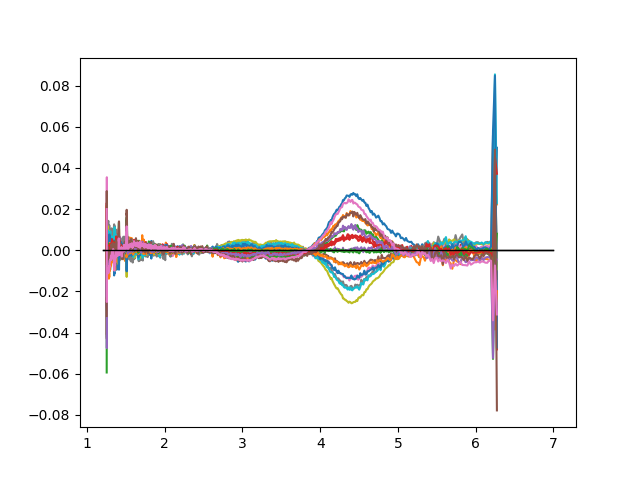

In [68]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


plt.plot([1.2,7],[0,0],'k-', linewidth = 1)
root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\MnTe\\Tepla dira\\Trojuhelnicek\\",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
print(filename)
root.destroy()
data = pd.read_csv(filename[0], index_col=0)
for (columnName, columnData) in data.iteritems():
    lil = data[data.index>2.5]
    lil = lil[lil.index<2.6]
    ofset = lil.mean(axis = 0)
    data[columnName] = data[columnName].subtract(ofset[columnName], axis=0)
    # del data['MOKE 0.52T up']
plt.plot(data,label = filename[0])
data.to_csv(r"C:\\Users\\tmale\\OneDrive\\Documents\\Data\\MnTe\\Tepla dira\\Trojuhelnicek\\MnTe_troj_smycka_sesunute_no_zrc.dat")    # NAME!!!!
plt.plot([1.2,7],[0,0],'k-', linewidth = 1)


# plt.legend()
plt.show()

## **Výpočet rs a rp koeficientů**

In [11]:
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget


path = r'C:\\Users\\tmale\\OneDrive\\Documents\\Data\\Mirrors\\Mirrors_n_k_pseudo.txt'
data = pd.read_csv(path,index_col=0)

uhly = np.arange(43,47.25,0.25)
vys = []

for i in uhly:
    koef = pd.DataFrame(index = data.index, columns = ['rsr','rsi','rpr','rpi'])
    vys.append(koef)

for i,n in zip(uhly,range(0,len(uhly))):
    for k in data.index:
        n2 = data.loc[k]['n '+ str("%.2f" % i)] + 1j*data.loc[k]['k '+ str("%.2f" % i)]
        ii = np.deg2rad(i)
        tt = np.arcsin(np.sin(ii)/n2)
        rs = (np.cos(ii)-n2*np.cos(tt))/(np.cos(ii)+n2*np.cos(tt))
        rp = (n2*np.cos(ii)-np.cos(tt))/(n2*np.cos(ii)+np.cos(tt))
        vys[n].loc[k]['rsr'] = np.real(rs)
        vys[n].loc[k]['rsi'] = np.imag(rs)
        vys[n].loc[k]['rpr'] = np.real(rp)
        vys[n].loc[k]['rpi'] = np.imag(rp)


print(vys)
pathh = r'C:\\Users\\tmale\\OneDrive\\Documents\\Data\\Mirrors\\Mirrors_reflectivity_angle_'

for i in range(0,len(uhly)):
    vys[i].to_csv(pathh+str(uhly[i])+'.txt')



[               rsr       rsi       rpr       rpi
eV                                              
6.424870  -0.93447 -0.013947  0.880832  0.024579
6.391753 -0.936087 -0.007304  0.883799  0.012892
6.358974  -0.93753  -0.00176  0.886389   0.00311
6.326530 -0.938925  0.004181  0.888845 -0.007399
6.294416   -0.9401  0.009179  0.890871 -0.016262
...            ...       ...       ...       ...
0.738095  -0.96737 -0.207372  0.904689  0.377141
0.736998 -0.967655 -0.207115  0.905296  0.376769
0.735905  -0.96769 -0.206887  0.905437  0.376364
0.734815 -0.967568 -0.206642  0.905297  0.375877
0.733728 -0.967863 -0.206248  0.905969  0.375257

[1084 rows x 4 columns],                rsr       rsi       rpr       rpi
eV                                              
6.424870 -0.934968 -0.012009  0.880838  0.021326
6.391753 -0.936781 -0.005493  0.884158  0.009771
6.358974 -0.937987  0.000117  0.886328 -0.000209
6.326530 -0.939485  0.006042  0.888968 -0.010776
6.294416 -0.940446  0.011489  0.890602 -0.

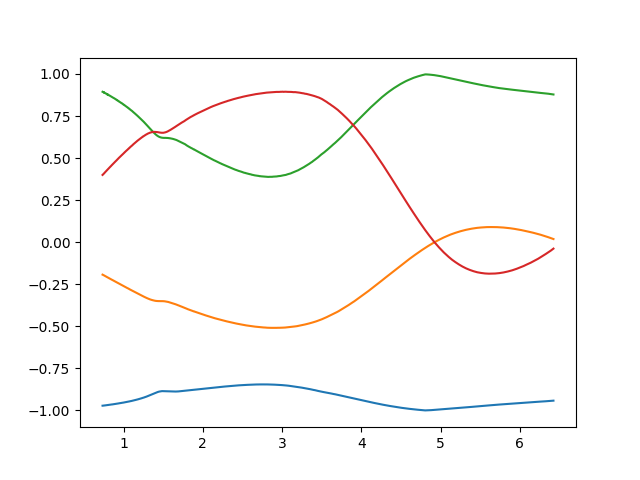

In [77]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget

path = 'C:/Users/tmale/OneDrive/Documents/Data\Mirrors/Mirrors visnovsky reflectivity/Energy/Mirrors_reflectivity_angle_47.0.txt'

data = pd.read_csv(path,index_col=0)
z = 65
k = 162
data.iloc[z:k,1] = -data.iloc[z:k,1]
data.iloc[z:k,3] = -data.iloc[z:k,3]

# data.to_csv(path)

plt.plot(data)

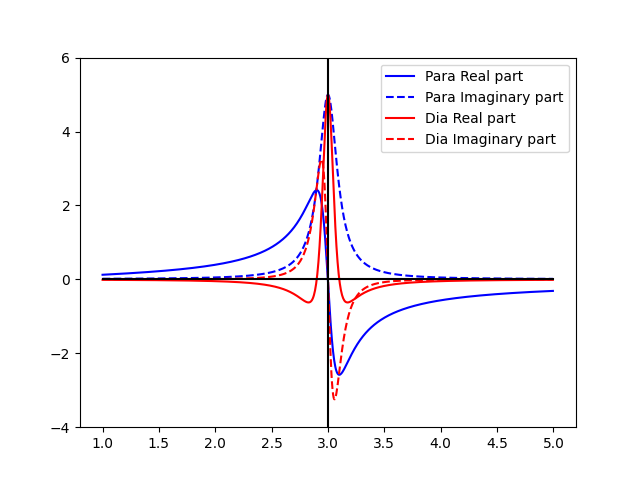

In [91]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget

gamma = 0.1
Eo = 3
emax = 5
e1real = []
e1imag = []
for omega in np.arange(1,5,0.005):
    e1real.append(2*gamma*emax*(omega*(omega**2-Eo**2+gamma**2))/((omega**2-Eo**2-gamma**2)**2+4*gamma**2*omega**2))
    e1imag.append(-2*gamma*emax*gamma*(omega**2+Eo**2-gamma**2)/((omega**2-Eo**2-gamma**2)**2+4*gamma**2*omega**2))
plt.plot(np.arange(1,5,0.005),[-i for i in e1real],'b-', label = 'Para Real part')
plt.plot(np.arange(1,5,0.005),[-i for i in e1imag],'b--', label = 'Para Imaginary part')

trans = pd.DataFrame()
trans['index'] = np.arange(1,5,0.005)
trans = trans.set_index('index')
trans['Repara'] = [-i for i in e1real]
trans['Impara'] = [-i for i in e1imag]

e1diareal = []
e1diaimag = []
for omega in np.arange(1,5,0.005):
    e1diareal.append(gamma**2*emax*((omega-Eo)**2-gamma**2)/((omega-Eo)**2+gamma**2)**2)
    e1diaimag.append(gamma**3*emax*2*(omega-Eo)/((omega-Eo)**2+gamma**2)**2)
plt.plot(np.arange(1,5,0.005),[-i for i in e1diareal],'r-', label = 'Dia Real part')
plt.plot(np.arange(1,5,0.005),[-i for i in e1diaimag],'r--', label = 'Dia Imaginary part')

trans['Redia'] = [-i for i in e1diareal]
trans['Imdia'] = [-i for i in e1diaimag]

trans.to_csv(r'C:\\Users\\tmale\\OneDrive\\Pictures\\Transitions.dat')

plt.plot([1,5],[0,0],'k-')
plt.plot([Eo,Eo],[-4,6],'k-')
plt.ylim(-4,6)
plt.legend()
plt.show()

('C:/Users/tmale/OneDrive/Documents/Data/LSMO/Francie 2021/Montana/PLD3969/MOKE final/PLD3969_MOKE_300K_07_04_2022_finalni.dat',)


KeyError: 'rot'

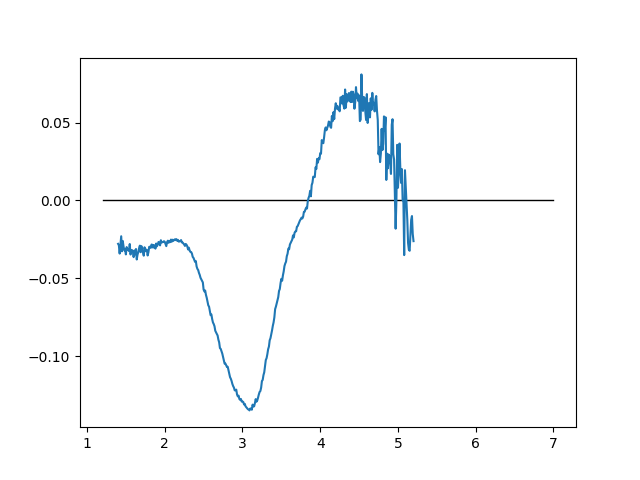

In [57]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import os
%matplotlib widget


plt.plot([1.2,7],[0,0],'k-', linewidth = 1)
def elipticity(rot):
    moke_data = pd.read_csv(rot, index_col = 0)
    energy = np.array(moke_data.index.astype(float))
    lmbda = 1240/energy
    K = np.power(lmbda,2)
    W = 1- 93.0665**2/K
    Q = 1/(np.power(W,2) * lmbda * np.sqrt(1+136.24/W))
    delta = (Q * 1.69508759865 * 100000 + 2.884488929) * np.pi/180
    elip = - (np.array(moke_data['elip']) - np.array(moke_data['rot'])*np.cos(delta))/np.sin(delta)
    moke_data['elip'] = - (np.array(moke_data['elip']) - np.array(moke_data['rot'])*np.cos(delta))/np.sin(delta)
    plt.plot(moke_data['elip'])
    elipticita = pd.DataFrame(elip,index = energy, columns = ['MOKE'])
    elipticita.to_csv(r'C:\\Users\\tmale\\OneDrive\Documents\Data\\LSMO\\Francie 2021\\Montana\\PLD3969\\MOKE final\\PLD3969_300K_Kerrelip_06_04_2022.dat')  # NAME !!!!   PLD3977_Kerrelip_04_01_2022.dat
    elipticita.to_csv(r'C:\\Users\\tmale\\OneDrive\Documents\Data\\test\\PLD3969_300K_Kerrelip_06_04_2022.dat') 
    plt.plot(elipticita['MOKE'], label = 'Elipticita')          # Debilku tenhle sobour musi znova nafitovat
    plt.plot(moke_data['rot'], label = 'Rotace')




root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
filename = filedialog.askopenfilename(initialdir = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\Montana\\PLD3969\\MOKE final",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=True)
print(filename)
root.destroy()

elipticity(filename[0])



# BACHA PRVNÍ SOUBOT MUSÍ BÝT ROTACE A DRUHÝ DESKY!

plt.ylim(-1,1)
plt.legend()
plt.show()

5.8044 1.0
5.8047 1.0


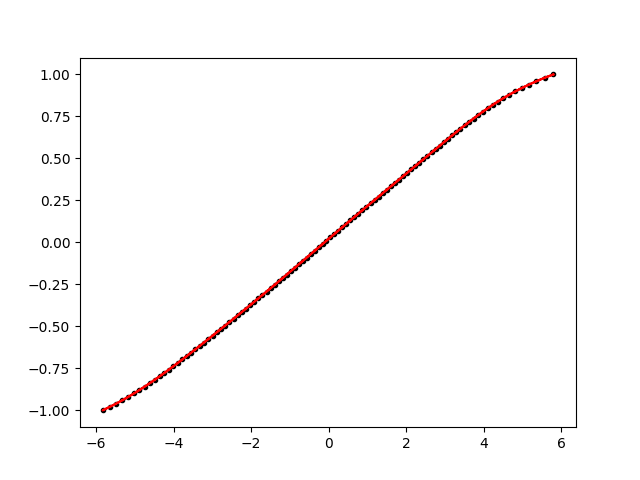

In [85]:
import os
from typing import List
from numpy.lib.function_base import append
import pandas as pd
from scipy.optimize import curve_fit as cf
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget





path = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE\\PLD3971\\spectra 121 - 130 - rot + smycka\\"
path = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE\\PLD3969\\spectra 83 - 90 + smycka\\"
name = 'time_8'
fields = list()
cur = []
directories = [f for f in os.listdir(path) if name in f]
for pole in directories:
    a = pole.find('_fieldc')
    b = pole.find('field_') + 6
    vole = float(pole[b:a])
    fields.append(vole)
    c = pole.find('fieldcurrent_') + 13
    d = pole.find('_time')
    curr = float(pole[c:d])
    cur.append(curr)

cur = list(dict.fromkeys(cur))
fields = list(dict.fromkeys(fields))
# print(cur[:102])
# print(fields[:102])
fields = fields + [-i for i in fields]
fit = np.polyfit(cur[:101],fields[:101],12)
fit2 = np.polyfit(cur[101:],fields[101:],12)
print(cur[0], fields[0])
# plt.plot(cur,fields,'k.')
# plt.plot(cur,[np.polyval(fit,i) for i in cur],'r-')
# plt.plot(cur,[np.polyval(fit2,i) for i in cur],'r-')


path = "C:\\Users\\tmale\\OneDrive\\Documents\\Data\\LSMO\\Francie 2021\\MOKE\\PLD3971\\spectra 121 - 130 - rot + smycka\\"
name = 'time_11'
fields = list()
cur = []
directories = [f for f in os.listdir(path) if name in f]
for pole in directories:
    a = pole.find('_fieldc')
    b = pole.find('field_') + 6
    vole = float(pole[b:a])
    fields.append(vole)
    c = pole.find('fieldcurrent_') + 13
    d = pole.find('.txt')
    curr = float(pole[c:d])
    cur.append(curr)

cur = list(dict.fromkeys(cur))
fields = list(dict.fromkeys(fields))
# print(cur[:102])
# print(fields[:102])
fields = fields + [-i for i in fields]
plt.plot(cur[:100],fields[:100],'k.')
plt.plot(cur,[np.polyval(fit,i) for i in cur],'r-')
# plt.plot(cur,[np.polyval(fit2,i) for i in cur],'r-')
print(cur[0] , fields[0])

plt.show()

G:/My Drive/MFF/Fyzika Mgr/Sdílená optika/Zimnice 2022/Magnetooptika/magnetooptika_praktikum/Vancik_Malecek_Kerr_smycka_2.txt
[ 0.32623296 -0.00259973]
    Napeti zdroj (V)  Lockin X (Vrms)  Lockin Y (Vrms)  Field B (mT)
0              -5.00         0.000164        -0.000002     -6.461811
1              -4.75         0.000165        -0.000002     -6.119266
2              -4.50         0.000165        -0.000002     -5.776722
3              -4.25         0.000165        -0.000002     -5.434177
4              -4.00         0.000165        -0.000002     -5.091633
..               ...              ...              ...           ...
77             -4.00         0.000166        -0.000002     -5.091633
78             -4.25         0.000166        -0.000002     -5.434177
79             -4.50         0.000166        -0.000002     -5.776722
80             -4.75         0.000166        -0.000002     -6.119266
81             -5.00         0.000166        -0.000002     -6.461811

[82 rows x 4 column

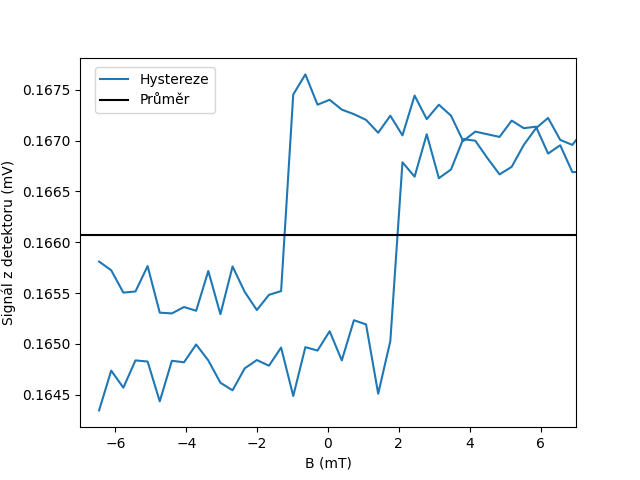

In [40]:
from tkinter import filedialog
from tkinter import *
from tkinter.filedialog import askopenfilename
from numpy.lib.function_base import append
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib widget

root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
filename = filedialog.askopenfilename(initialdir = r"G:/My Drive/MFF/Fyzika Mgr\Sdílená optika\Zimnice 2022/Magnetooptika/magnetooptika_praktikum/",title = "Select file",filetypes = (("txt files","*.dat .txt .KNT"),("all files","*.*")),multiple=False)
root.destroy()
print(filename)

v = [0.7,2.4,7.0,10.5]
a = [0.23,0.78,2.27,3.43]
fit = np.polyfit(v,a,1)
print(fit)

data = pd.read_csv(filename,sep='\t')
data.loc[:,'Field B (mT)'] = (data.iloc[:,0]*fit[0]+fit[1])*4.2+0.4
nula = 1000*data.iloc[:,1].mean()
plt.plot(data.iloc[:,3],1000*data.iloc[:,1],label='Hystereze')
plt.plot([-10,10],[nula,nula],'k-',label='Průměr')
plt.xlabel('B (mT)')
plt.ylabel('Signál z detektoru (mV)')
print(data)

# plt.plot([(data.iloc[0,2]*fit[0]+fit[1])*4.2+0.4,-(data.iloc[0,2]*fit[0]+fit[1])*4.2+0.4],[0,0],'k-')

plt.legend( loc = [0.03,0.85])
plt.xlim(-7,7)
plt.show()